## Importing the libraries

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Preparing and Analyzing the dataset

In [136]:
d1 = pd.read_csv('akdata1.csv')
dataset = pd.DataFrame(d1)

In [137]:
dataset

,n_doping,p_doping,Temp,tpe,tph,vin,iout
0,15.0,15.0,250,1000,1000,-0.20,-19.322393
1,15.0,15.0,250,1000,1000,-0.15,-19.335358
2,15.0,15.0,250,1000,1000,-0.10,-19.391474
3,15.0,15.0,250,1000,1000,-0.05,-19.450997
4,15.0,15.0,250,1000,1000,0.00,-28.812479
...,...,...,...,...,...,...,...
34015,20.0,20.0,450,10000000,10000000,0.60,-6.427128
34016,20.0,20.0,450,10000000,10000000,0.65,-5.866461
34017,20.0,20.0,450,10000000,10000000,0.70,-5.308919
34018,20.0,20.0,450,10000000,10000000,0.75,-4.754487


In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34020 entries, 0 to 34019
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_doping  34020 non-null  float64
 1   p_doping  34020 non-null  float64
 2   Temp      34020 non-null  int64  
 3   tpe       34020 non-null  int64  
 4   tph       34020 non-null  int64  
 5   vin       34020 non-null  float64
 6   iout      34020 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.8 MB


In [139]:
#Stats of the data
dataset.describe()

,n_doping,p_doping,Temp,tpe,tph,vin,iout
count,34020.00000,34020.00000,34020.000000,3.402000e+04,3.402000e+04,34020.000000,34020.000000
mean,17.50000,17.50000,350.000000,3.367000e+06,3.367000e+06,0.300000,-10.681079
std,1.70785,1.70785,70.711717,4.690482e+06,4.690482e+06,0.302769,4.723272
min,15.00000,15.00000,250.000000,1.000000e+03,1.000000e+03,-0.200000,-29.517126
25%,16.00000,16.00000,300.000000,1.000000e+03,1.000000e+03,0.050000,-13.908344
50%,17.50000,17.50000,350.000000,1.000000e+05,1.000000e+05,0.300000,-9.915427
75%,19.00000,19.00000,400.000000,1.000000e+07,1.000000e+07,0.550000,-6.575118
max,20.00000,20.00000,450.000000,1.000000e+07,1.000000e+07,0.800000,-3.568636


In [140]:
#checking missing values
dataset.isnull().sum() 

n_doping    0
p_doping    0
Temp        0
tpe         0
tph         0
vin         0
iout        0
dtype: int64

In [141]:
dataset.corr()

,n_doping,p_doping,Temp,tpe,tph,vin,iout
n_doping,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.828952e-18,-0.108469
p_doping,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.727969e-18,-0.143186
Temp,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-2.926755e-20,0.467121
tpe,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-1.390866e-17,0.000007
tph,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-2.891613e-20,0.000007
vin,-6.828952e-18,-6.727969e-18,-2.926755e-20,-1.390866e-17,-2.891613e-20,1.000000e+00,0.745481
iout,-1.084689e-01,-1.431865e-01,4.671212e-01,6.909454e-06,6.909454e-06,7.454809e-01,1.000000


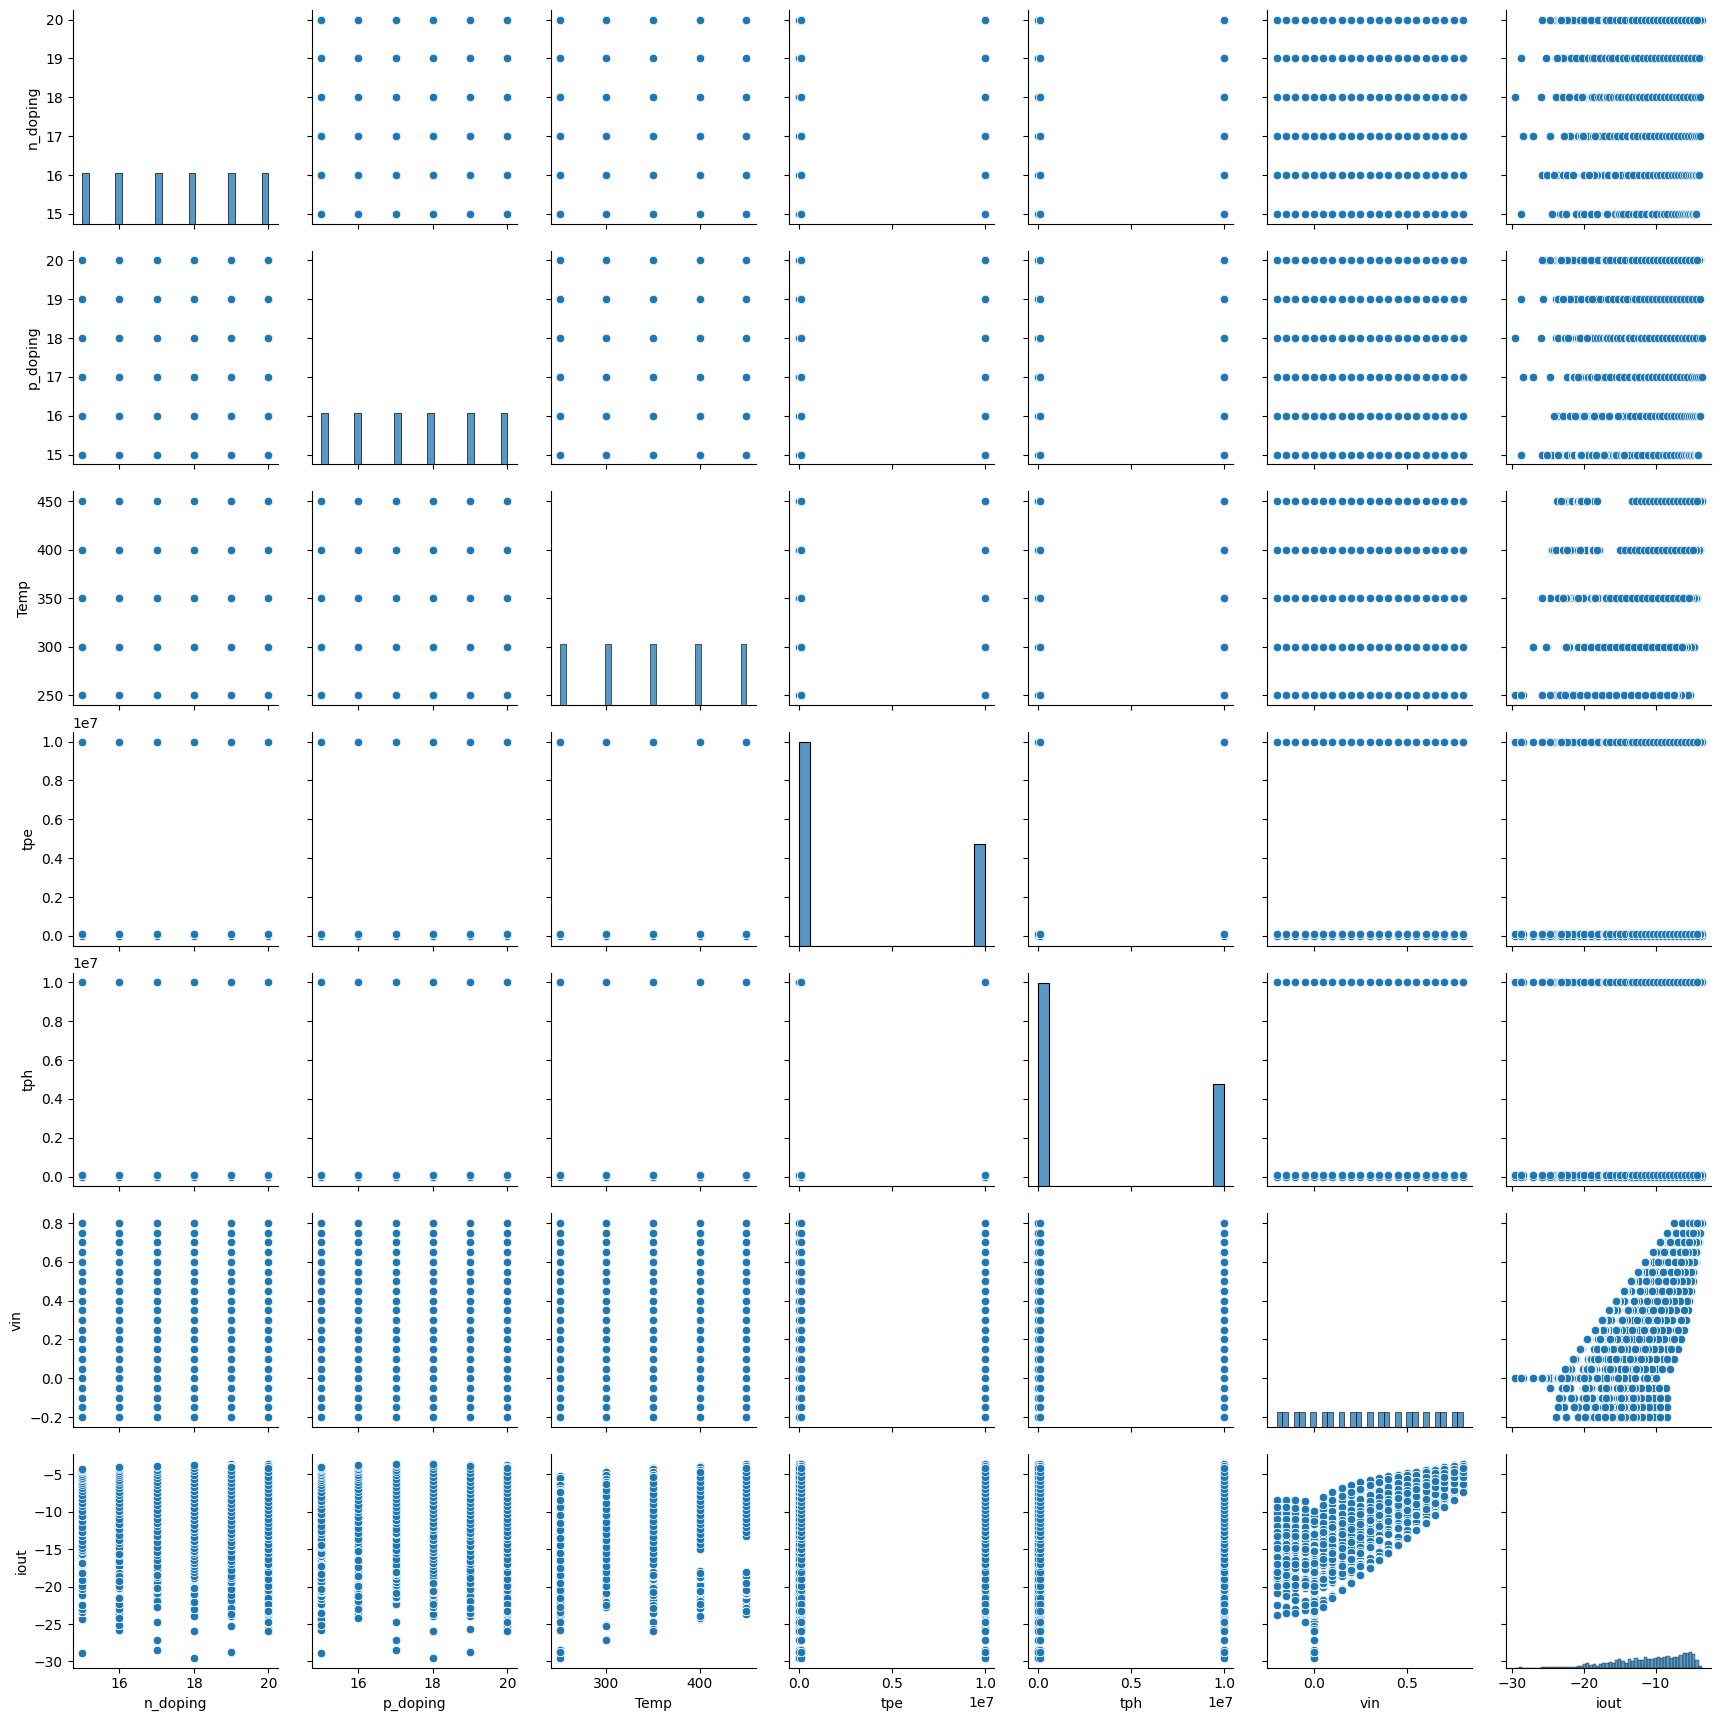

In [142]:
import seaborn as sns
sns.pairplot(dataset)

Text(0, 0.5, 'iout')

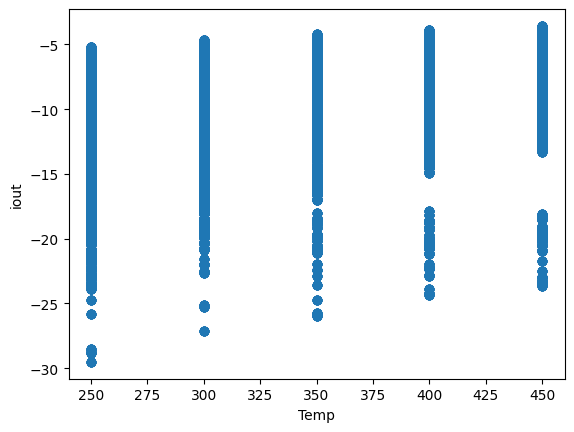

In [143]:
plt.scatter(dataset['Temp'],dataset['iout'])
plt.xlabel("Temp")
plt.ylabel("iout")

<AxesSubplot:xlabel='Temp', ylabel='iout'>

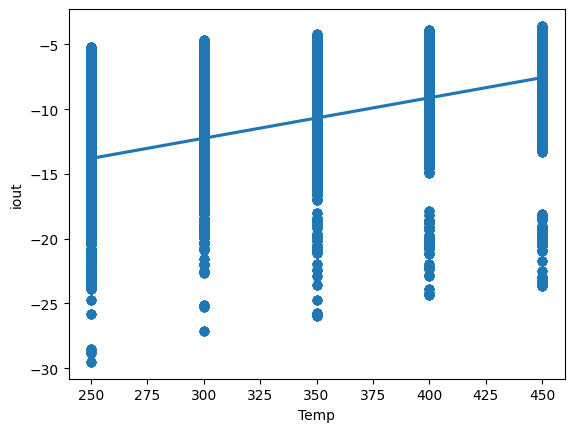

In [144]:
sns.regplot(x="Temp",y="iout",data=dataset)

Text(0, 0.5, 'iout')

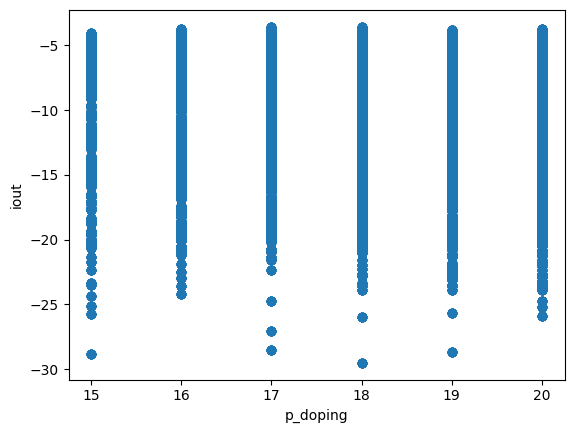

In [145]:
plt.scatter(dataset['p_doping'],dataset['iout'])
plt.xlabel("p_doping")
plt.ylabel("iout")

<AxesSubplot:xlabel='p_doping', ylabel='iout'>

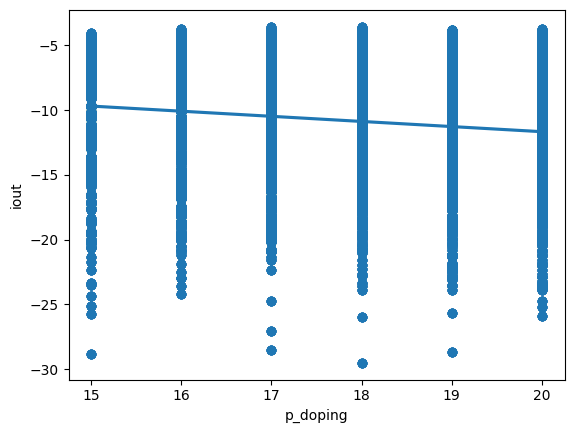

In [146]:
sns.regplot(x="p_doping",y="iout",data=dataset)

## Train Test Split

In [147]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]


In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [149]:
X_train

,n_doping,p_doping,Temp,tpe,tph,vin
4010,15.0,19.0,300,1000,100000,0.80
26476,19.0,19.0,250,1000,1000,0.60
27444,19.0,20.0,250,1000,100000,0.70
16036,17.0,19.0,450,10000000,100000,0.45
32432,20.0,19.0,300,100000,10000000,0.20
...,...,...,...,...,...,...
16850,17.0,20.0,450,1000,100000,0.20
6265,16.0,15.0,400,1000,100000,0.15
11284,16.0,20.0,450,10000000,1000,0.15
860,15.0,15.0,450,100000,100000,0.80


In [150]:
y_train

4010     -4.920819
26476   -11.264401
27444    -9.365523
16036    -6.468521
32432   -16.116907
           ...    
16850    -9.164309
6265     -8.473661
11284    -8.265200
860      -5.928118
15795   -13.210419
Name: iout, Length: 27216, dtype: float64

## Feature Scaling

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [153]:
X_train

array([[-1.46341206,  0.87938994, -0.70920632, -0.72192786, -0.69483614,
         1.65613191],
       [ 0.88028622,  0.87938994, -1.41630817, -0.72192786, -0.71596008,
         0.99595203],
       [ 0.88028622,  1.46394595, -1.41630817, -0.72192786, -0.69483614,
         1.32604197],
       ...,
       [-0.87748749,  1.46394595,  1.41209923,  1.40555384, -0.71596008,
        -0.48945269],
       [-1.46341206, -1.45883409,  1.41209923, -0.70086368, -0.69483614,
         1.65613191],
       [-0.29156292,  0.87938994,  0.70499738, -0.70086368,  1.41755811,
        -1.14963257]])

## Training the Model

In [154]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [155]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [156]:
reg_pred=regressor.predict(X_test)
reg_pred

array([-18.42620611,  -6.23290625,  -7.57374453, ..., -16.49035038,
        -5.09919526,  -5.62669783])

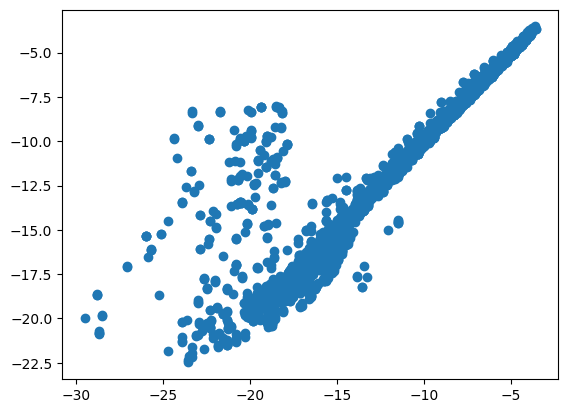

In [157]:
plt.scatter(y_test,reg_pred)

## Checking the Accuracy

In [158]:
regressor.score(X_train,y_train) 

0.8898551904147436

In [159]:
residuals=y_test-reg_pred
residuals

9578     1.284743
5533     0.081711
10560    0.194921
5836     0.104356
344      0.197830
           ...   
367      0.106019
16485   -0.433510
27910    0.547255
30824    0.120385
6024    -0.030879
Name: iout, Length: 6804, dtype: float64

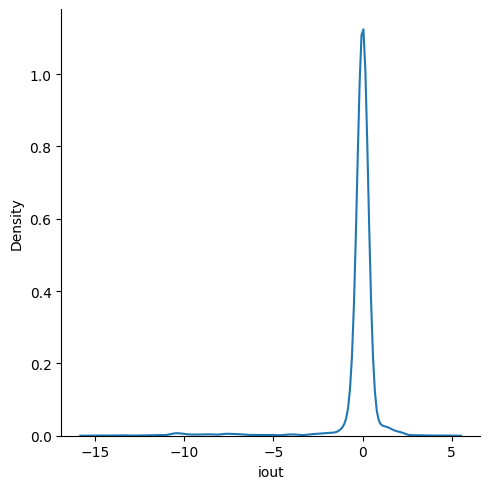

In [160]:
sns.displot(residuals,kind='kde')

In [161]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print(mean_absolute_error(y_test,reg_pred))
#print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_absolute_error(y_test,reg_pred)))

0.4686833035948662
0.6846044869812542


In [162]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.8870491680613226


Text(0, 0.5, 'I')

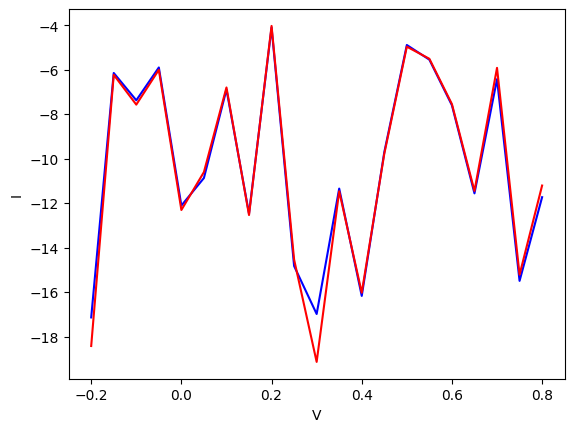

In [163]:
x1 = np.arange(-0.2,0.85,0.05)
plt.plot(x1, y_test[0:21], color = 'blue')
plt.plot(x1, reg_pred[0:21], color = 'red')
plt.xlabel('V')
plt.ylabel('I')


## Pickling the File

In [164]:
import pickle
pickle.dump(regressor,open('regmodel.pkl','wb'))

## New Data Prediction

In [165]:
X.iloc[0].values.reshape(1,-1)

array([[ 1.5e+01,  1.5e+01,  2.5e+02,  1.0e+03,  1.0e+03, -2.0e-01]])

In [166]:
output = regressor.predict(scaler.transform(X.iloc[0].values.reshape(1,-1)))
print(output)

[-19.19458269]


c:\Users\Prateek Girhepuje\Desktop\Intern_project\pn_diode\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [167]:
antilog = np.power(10,output)
print(antilog)

[6.38877084e-20]
